In [4]:
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from Data import Data
from DenseNetwork import DenseNetwork
from Layer import Layer, Input_Layer

In [5]:
def importData(data_name, train_percentage):
    data = Data(data_name)
    data.prepare_data(train_percentage)
    return data

data_name, train_percentage = "MNIST_dataset.csv", 0.04
data = importData(data_name, train_percentage)

In [6]:
def trainNetwork(n_layers, n_nodes_list, x_data, y_data, epoch, alpha):
    dense_network = DenseNetwork(n_layers, n_nodes_list)
    dense_network.initialize_weights()
    dense_network.initialize_layers(data.x_train)
    dense_network.link_layers()
    for i in range(epoch + 1):
        dense_network.forward_feed()
        dense_network.backward_feed(y_data)
        dense_network.update_network(alpha)
        if i % 50 == 0:
            print(dense_network.printStatement(y_data, i, epoch))
    return dense_network

n_layers, n_nodes_list, x_data, y_data, epoch, alpha = 4, [784, 520, 50, 10], data.x_train, data.y_train_vector.T, 1, 1
dense_network = trainNetwork(n_layers, n_nodes_list, x_data, y_data, epoch, alpha)

activate_ReLU
ReLU
activate_ReLU
ReLU
activate softmax
softmax
16800
softmax deactivate
weight delta
bias delta
16800
deactivate relu
deriv_ReLU
weight delta
bias delta
16800
deactivate relu
deriv_ReLU
weight delta
bias delta
16800
Loss :9.036521428617732; MSE: 0.09204498434083283; Accuracy: 0.060714285714285714 0 / 1
activate_ReLU
ReLU
activate_ReLU
ReLU
activate softmax
softmax
16800
softmax deactivate
weight delta
bias delta
16800
deactivate relu
deriv_ReLU
weight delta
bias delta
16800
deactivate relu
deriv_ReLU
weight delta
bias delta
16800


In [13]:
dense_network.layers_list[-1].A[0]

array([0.13185163, 0.1750457 , 0.14715125, ..., 0.15566647, 0.08868521,
       0.1255762 ])

In [14]:
np.std(dense_network.layers_list[0].Z, axis=0)[0:10]


array([0.27823196, 0.33217328, 0.41828104, 0.31517911, 0.27485536,
       0.25091153, 0.33600993, 0.34431352, 0.31782206, 0.31515454])

In [30]:
np.std(dense_network.layers_list[0].Z[0])

0.0

In [ ]:
dense_network.layers_list[0].Z

In [ ]:
dense_network.layers_list[0].Z[1]

In [25]:
np.mean(dense_network.weights_list[0].data)

3.756988151996047e-05

In [30]:
dense_network.layers_list[3].bias.delta

array([0.])

In [26]:
dense_network.weights_list[0].delta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
dense_network.layers_list[1].bias.data

array([[-3.14453395e-02],
       [-7.69695251e-02],
       [-3.00804305e-02],
       [-7.32067708e-02],
       [-1.61742409e-02],
       [-1.31860167e-02],
       [-5.18918388e-02],
       [-8.31134309e-03],
       [-1.42045439e-03],
       [-9.00657663e-03],
       [ 5.07671748e-03],
       [-3.36364487e-02],
       [-1.21237786e-02],
       [-3.74033943e-02],
       [ 1.98124706e-03],
       [ 1.54397242e-02],
       [-4.12438922e-03],
       [ 1.51083437e-02],
       [-6.14451875e-02],
       [-1.64561410e-02],
       [-3.38209340e-02],
       [-3.31415887e-02],
       [ 2.61920983e-03],
       [-1.89103228e-02],
       [-3.26773093e-02],
       [-2.23290539e-02],
       [-1.26234544e-02],
       [-3.57756002e-02],
       [-4.24041713e-02],
       [-1.68215853e-02],
       [ 4.25507072e-02],
       [-4.09983570e-02],
       [-5.31199599e-02],
       [-4.30867861e-02],
       [-5.97238987e-03],
       [-2.79913784e-02],
       [-2.74621548e-02],
       [-5.47350963e-02],
       [-1.1

In [12]:
import pickle
pickle.dump(dense_network, open("dense_network", "wb"), pickle.HIGHEST_PROTOCOL)

In [3]:
net = pickle.load(open("dense_network", "rb"))

I predict it as [5]


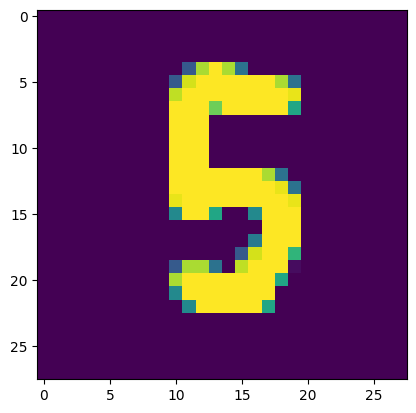

In [9]:
from PIL import Image, ImageOps
img = Image.open("test_7.png")
img = ImageOps.grayscale(img)
img = np.asarray(img)
img = 1 - img / 255.
plt.imshow((img))

dense_network.prediction((img).reshape(784, 1))